# Projet Machine Learning - TP1 - Partie 1

## A. Génération des données

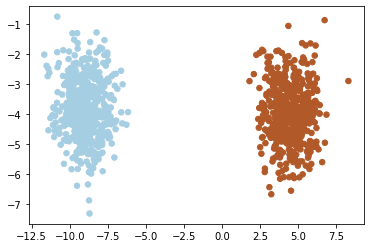

In [43]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
import pickle



X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std =1.0, center_box=(-10.0,10.0))



X0 = (X[:,0])
X1 = (X[:,1])

plt.scatter(X0, X1, c=y, s=30, cmap=plt.cm.Paired)

In [59]:
#Normalisation des données

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

print(X)

[[ 4.44240309 -3.24659195]
 [ 2.44271142 -3.80155268]
 [-8.76894001 -4.55115442]
 ...
 [-9.12705882 -4.8247419 ]
 [ 4.34170685 -3.34246079]
 [ 4.94935512 -4.04830937]]


In [60]:
print(X_norm)

[[ 0.98795267  0.62130034]
 [ 0.69400333  0.0637735 ]
 [-0.95407953 -0.68929438]
 ...
 [-1.00672204 -0.96414691]
 [ 0.97315059  0.52498821]
 [ 1.06247326 -0.18412418]]


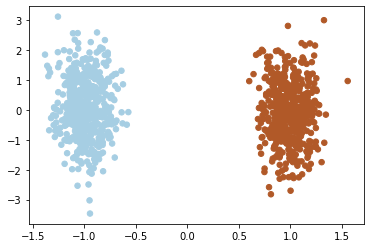

In [61]:
plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [89]:
# Application de la PCA
#from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#pca_n = pca.fit(X_norm)

#print(pca.explained_variance_ratio_)

#pca_n


## B. SVM Linéaire
### Données Linéairement séparables

In [101]:
# Application du model LinearSVC à margge stricte
from sklearn import svm, metrics
colors = np.array([x for x in "bgrcmyk"])


# On initialise C à une valeur élevée de manière à rendre notre marge plus stricte
linsvm= svm.LinearSVC(C=1000)
linsvm.fit(X_norm, y)

#évaluer le modèle 
ypred= linsvm.predict(X_norm)

#tauxd’erreur
err_train= 1 - metrics.accuracy_score(ypred, y)
print("Train error: %.3f" % err_train)

#matrice de confusion
conf = metrics.confusion_matrix(y, ypred)

Train error: 0.000


In [102]:
conf

array([[500,   0],
       [  0, 500]], dtype=int64)

500 exemples de la classe un sont reconnus en classe 1, pareil pour la classe 2

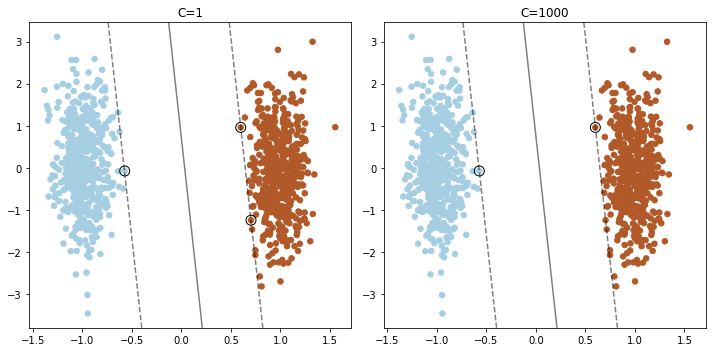

In [106]:
from sklearn.svm import LinearSVC

# Représentation des Supports vectors
plt.figure(figsize=(10, 5))

for i, C in enumerate([1, 1000]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_norm, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_norm)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_norm[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()

### Données non-linéairement séparables

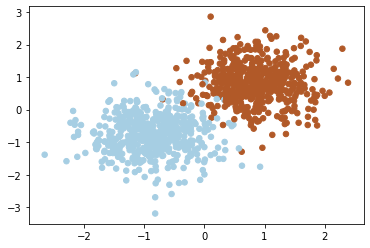

In [117]:
#On augmente l'écart-type au sein de notre distribution
X,y = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std =5.0, center_box=(-10.0,10.0))

X0 = (X[:,0])
X1 = (X[:,1])


#Normalisation des données
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
plt.scatter(X_norm[:,0], X_norm[:,1] , c=y, s=30, cmap=plt.cm.Paired)

In [134]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit

#Création des groupes de validation
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
sss.get_n_splits(X_norm, y)
print(sss)

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=None)


In [135]:
#Séparation des données en train et en test
for train_index, test_index in sss.split(X_norm, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [584 376 814 199 464 636 669 986 843 420 194 127 936 477 324 522 439 292
 893 647 549 267  81 880 958 764 876 839 304 990 158 207 166 818  66 594
 457 999 978 976 349 694 555 520 606 459 575 115 867 321 248 153  87 613
 412 302 761 458 290 424 859  30 348 481  18 494 919  90  33  52  46 288
 280 618 938 527 134 979 143 562 612 949 336 108 995 388  13 218 904 891
 627 719 796 306 621 138 732   4  12   6  56 345 748 485 939 915 373 696
 998 429 994 116  22  14 820  32 352 256 601 940 211 737 123 528 683  76
 664 521 266 933 758 514 853 320 882 944  17 547 451 512 946 712 597 437
 799  24 926 591 759 930 277 832 927 910 344 169 644 109 690 500 176 728
 815  44 828 593 689 137 329  31 182 985 810 380 428 393   9 743 779 548
 471 868 467 961  99 177   0 823 715 624 492 327 104 723 225 167 896 819
 746 989 895 908 725 279 435 856 572 972 197 825 769 738 455 586 179 126
 754 778 204 247 465  82 175 706 747 803 478 964 524 310 956  97 641 840
  42 282 645  58 110 410  92  48 103 590 278

C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Rudyl\anaconda3\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


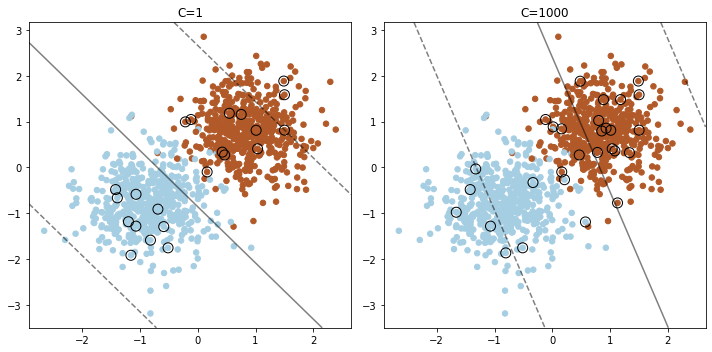

In [145]:
from sklearn.svm import LinearSVC

# Représentation des Supports vectors
plt.figure(figsize=(10, 5))

for i, C in enumerate([1, 1000]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X_train, y_train)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X_train)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X_norm[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
plt.tight_layout()
plt.show()